<a href="https://colab.research.google.com/github/manan-arya/Major_Project/blob/Additional_Work/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
import random
import matplotlib.pyplot as plt

In [0]:
url = "https://raw.githubusercontent.com/saranshtaneja/genetic_major/master/fb_dataset.csv"

In [0]:
data = pd.read_csv(url)

In [116]:
data

,facebook_post_id,dominant_color.histogram[0],dominant_color.histogram[1],dominant_color.histogram[2],dominant_color.histogram[3],dominant_color.histogram[4],dominant_color.histogram[5],dominant_color.histogram[6],dominant_color.histogram[7],dominant_color.histogram[8],dominant_color.histogram[9],dominant_color.value,face_detection.average_face2frame_ratio,face_detection.average_face_count_per_frame,face_detection.average_face_present,general.duration,general.fps,general.frame_count,general.frame_size.height,general.frame_size.width,other.average_movie_speed,other.clutter_metric,rigidity.average_rigidity,shot_detection.average_shot_length,shot_detection.shots_count,shot_detection.transition_histogram[0],shot_detection.transition_histogram[1],text_detection.average_text2frame_ratio,text_detection.average_text_frames,title.sentiment,views.1,shares.1,comments.1,likes.1,views.2,shares.2,comments.2,likes.2,views.3,shares.3,...,views.159,shares.159,comments.159,likes.159,views.160,shares.160,comments.160,likes.160,views.161,shares.161,comments.161,likes.161,views.162,shares.162,comments.162,likes.162,views.163,shares.163,comments.163,likes.163,views.164,shares.164,comments.164,likes.164,views.165,shares.165,comments.165,likes.165,views.166,shares.166,comments.166,likes.166,views.167,shares.167,comments.167,likes.167,shares.168,comments.168,likes.168,views.168
0,407570359384477_612049142269930,0.002330,0.285182,0.321528,0.191053,0.000000,0.000000,0.000000,0.007922,0.093197,0.098788,2,0.015108,0.251165,0.243243,85.840000,25,2146,224,400,1.680012,0.161410,0.212954,4.517895,19,1.000000,0.000000,0.054041,0.446412,4.651,21057,370,69,652,36707,619,105,1000,48639,796,...,350437,4913,376,4223,350504,4914,376,4223,350577,4915,376,4223,350642,4915,376,4223,350716,4916,376,4223,350785,4916,376,4223,350858,4916,376,4224,350942,4916,376,4225,351045,4916,376,4225,4916,376,4225,351137
1,407570359384477_612108412264003,0.005907,0.463291,0.059072,0.192405,0.000000,0.000000,0.000000,0.093671,0.157806,0.027848,1,0.009970,0.304641,0.098734,47.400000,25,1185,224,400,15.270662,0.106316,0.270886,3.950000,12,0.833333,0.166667,0.052529,0.451477,4.566,15618,168,27,475,22384,246,33,690,24171,292,...,87968,578,61,1617,87998,578,61,1617,88020,578,61,1617,88029,578,61,1617,88042,578,61,1617,88066,578,61,1617,88094,578,61,1617,88110,579,61,1617,88128,579,61,1617,579,61,1617,88149
2,407570359384477_612000682274776,0.000000,0.377131,0.072443,0.093750,0.000000,0.000000,0.000000,0.197443,0.125000,0.134233,1,0.014187,0.171165,0.171165,56.320000,25,1408,224,400,4.000194,0.188503,0.387074,4.693333,12,0.750000,0.250000,0.084811,0.714489,3.721,2,81,67,329,35031,109,83,437,41947,123,...,116446,329,170,1193,116454,329,170,1193,116462,329,170,1193,116479,329,170,1193,116504,329,170,1193,116521,329,170,1193,116545,329,170,1193,116570,329,170,1193,116582,329,170,1193,329,170,1193,116597
3,407570359384477_612254708916040,0.000000,0.592656,0.144475,0.079272,0.072066,0.012697,0.000000,0.097117,0.001716,0.000000,1,0.006673,0.067605,0.066575,116.560000,25,2914,224,400,5.159395,0.098545,0.355525,5.067826,23,0.739130,0.260870,0.035462,0.315717,3.851,89140,4407,235,3486,213383,9438,402,6044,347713,14571,...,18606897,464169,7616,121156,18613170,464233,7616,121198,18619570,464290,7619,121244,18626146,464343,7622,121288,18632836,464385,7624,121330,18638793,464418,7626,121367,18643654,464447,7627,121397,18647758,464489,7628,121419,18651565,464539,7631,121442,464591,7633,121472,18655415
4,407570359384477_612167392258105,0.000000,0.116180,0.436074,0.154377,0.000000,0.000000,0.000000,0.293369,0.000000,0.000000,2,0.008844,0.094430,0.094430,75.400000,25,1885,224,400,5.295101,0.109216,0.611141,4.712500,16,0.812500,0.187500,0.049729,0.327321,4.901,17304,240,127,233,26215,355,176,337,29539,438,...,432502,6536,1032,1513,432868,6541,1032,1514,433204,6543,1032,1515,433517,6548,1032,1515,433862,6556,1032,1516,434279,6565,1033,1517,434799,6573,1033,1517,435447,6581,1035,1517,436017,6589,1035,1517,6597,

In [0]:
y_pso = data["views.168"]

In [0]:
y_train = data.iloc[0:100,701].values

In [119]:
y_train

array([  351137,    88149,   116597, 18655415,   436438,   157322,
         655080, 18545567,  2094083,   228012,   204031,   861457,
         239391,    99903,  2401060,    84662,   101959,   166887,
         921144,   482693,    68552,   940889,  3443341, 12534857,
         271561,  5348076,   219110,   386750,   346060,   108110,
         140379,  1459499,   145033,    91692,   238945,   127362,
         182856,   171804,   136407,   178574,   196439,   221235,
       12459800,   197053,   855608,   427615,   396986,   103368,
        1026399,   167236,    93320,   115442,    82210,   504095,
         101372,   875213,   152145,   287631,   160717,   153040,
         482561,    73120,   218066,   453774,   498355,   226748,
        1242092,   149005,   264851,   534427,   201941,   128636,
         176513,   112050,   205503,   164595,   718629,   409014,
         253287,   529824,  1043924,   115623,   145326,  1024423,
         196642,   184262,   806253,    60457,   271048,   111

In [0]:
x_pso = data.drop("views.168",axis=1)

In [0]:
x_train = data.iloc[0:100,1:701].values

In [122]:
x_train

array([[2.32991600e-03, 2.85181733e-01, 3.21528425e-01, ...,
        4.91600000e+03, 3.76000000e+02, 4.22500000e+03],
       [5.90717300e-03, 4.63291139e-01, 5.90717300e-02, ...,
        5.79000000e+02, 6.10000000e+01, 1.61700000e+03],
       [0.00000000e+00, 3.77130682e-01, 7.24431820e-02, ...,
        3.29000000e+02, 1.70000000e+02, 1.19300000e+03],
       ...,
       [0.00000000e+00, 3.53634578e-01, 4.09954158e-01, ...,
        2.16911000e+05, 1.16270000e+04, 9.52820000e+04],
       [0.00000000e+00, 2.63128176e-01, 4.81084133e-01, ...,
        1.65000000e+02, 8.30000000e+01, 8.48000000e+02],
       [4.83465500e-03, 2.09630632e-01, 7.49564881e-01, ...,
        5.78900000e+03, 3.37000000e+02, 6.87300000e+03]])

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
parameters = {'epsilon':[0,2], 'C':[1, 1000]}

In [0]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
x=sc_x.fit_transform(x_train)
y=sc_y.fit_transform(y_train.reshape(-1,1))

In [0]:
y=y.ravel()

In [127]:
y.shape

(100,)

In [128]:
x.shape

(100, 700)

In [0]:
from sklearn.svm import SVR

In [0]:
svr = SVR(kernel='rbf',C = 10000)

In [0]:
clf = GridSearchCV(svr, parameters)

In [132]:
clf.fit(x, y)
GridSearchCV(estimator=svr,
             param_grid={'C': [1, 10000], 'epsilon': [0,2]})

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=10000, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10000], 'epsilon': [0, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [133]:
clf.best_params_

{'C': 1000, 'epsilon': 0}

In [134]:
score = np.mean(cross_val_score(svr, x, y,  cv=5,  scoring=None))
score

0.7214387780291002

In [0]:
 class GeneticSelector :
  
  
  def __init__(self, estimator, n_gen, size, n_best, n_rand, 
                 n_children, mutation_rate):
    # Estimator 
    self.estimator = estimator
    # Number of generations
    self.n_gen = n_gen
    # Number of chromosomes in population
    self.size = size
    # Number of best chromosomes to select
    self.n_best = n_best
    # Number of random chromosomes to select
    self.n_rand = n_rand
    # Number of children created during crossover
    self.n_children = n_children
    # Probablity of chromosome mutation
    self.mutation_rate = mutation_rate
    if int((self.n_best + self.n_rand) / 2) * self.n_children != self.size:
      raise ValueError("The population size is not stable.")
  
  
  def initilize(self):
    population = []
    for i in range(self.size):
      chromosome = np.ones(self.n_features, dtype=np.bool)
      mask = np.random.rand(len(chromosome)) < 0.3 #The probability 0.3 is chosen arbitrarily, however it is suggested to avoid large probabilities. We would not like to create chromosomes with all variables excluded
      chromosome[mask] = False
      population.append(chromosome)
    return population
  
  
  def fitness(self, population):
    X, y = self.dataset
    scores = []
    for chromosome in population:
      score =-1* np.mean(cross_val_score(self.estimator, X[:,chromosome], y, 
                                                        cv=5, 
                                                        scoring=None))
      scores.append(score)
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    print(-1*scores[inds[0]])
    #print(population[inds[0]])
    return list(scores[inds]), list(population[inds,:])
  
  
  def select(self, population_sorted):
    population_next = []
    for i in range(self.n_best):
      population_next.append(population_sorted[i])
    for i in range(self.n_rand):
      population_next.append(random.choice(population_sorted))
    random.shuffle(population_next)
    return population_next
  
  
  def crossover(self, population):
    population_next = []
    for i in range(int(len(population)/2)):
      for j in range(self.n_children):
        #print(i)
        chromosome1, chromosome2 = population[i], population[len(population)-1-j]
        #print(type(chromosome2))
        child = chromosome1
        mask = np.random.rand(len(child)) > 0.5
        for k in range(len(mask)):
          if(mask[k] == True):
            child[k]=chromosome2[k]
        population_next.append(child)
    return population_next
  
  
  def mutate(self, population):
    population_next = []
    for i in range(len(population)):
      chromosome = population[i]
      if random.random() < self.mutation_rate:
        mask = np.random.rand(len(chromosome)) < 0.05
        for k in range(len(mask)):
          if(mask[k]==True):
            chromosome[k] = False
      population_next.append(chromosome)
    return population_next  
  
  
  def generate(self, population):
    # Selection, crossover and mutation
    scores_sorted, population_sorted = self.fitness(population)
    #print(type(population_sorted[1]))
    population = self.select(population_sorted)
    #print(type(population[3]))
    population = self.crossover(population)
    #print(len(population))
    population = self.mutate(population)
    #print(len(population))
    # History
    self.chromosomes_best.append(population_sorted[0])
    self.scores_best.append(scores_sorted[0])
    self.scores_avg.append(np.mean(scores_sorted))
    return population
  
  
  def fit(self, X, y):
    self.chromosomes_best = []
    self.scores_best, self.scores_avg  = [], []
    self.dataset = X, y
    self.n_features = X.shape[1]
    population = self.initilize()
    for i in range(self.n_gen):
      population = self.generate(population)
    return self 
    
  @property
  
  
  def support_(self):
      return self.chromosomes_best[-1]
 
  
  def plot_scores(self):
      plt.plot(self.scores_best, label='Best')
      plt.plot(self.scores_avg, label='Average')
      plt.legend()
      plt.ylabel('Scores')
      plt.xlabel('Generation')
      plt.show()
  
  def ret_pop(self):
    return self.chromosomes_best 
  

In [0]:
def initilize(self):
  population = []
  for i in range(self.size):
    chromosome = np.ones(self.n_features, dtype=np.bool)
    mask = np.random.rand(len(chromosome)) < 0.3 #The probability 0.3 is chosen arbitrarily, however it is suggested to avoid large probabilities. We would not like to create chromosomes with all variables excluded
    chromosome[mask] = False
    population.append(chromosome)
    return population

In [0]:
def fitness(self, population):
  X, y = self.dataset
  scores = []
  for chromosome in population:
    score = -1.0 * np.mean(cross_val_score(self.estimator, X[:,chromosome], y, 
                                                        cv=5, 
                                                        scoring="neg_mean_squared_error"))
    scores.append(score)
  scores, population = np.array(scores), np.array(population) 
  inds = np.argsort(scores)
  print(scores[-1])
  return list(scores[inds]), list(population[inds,:])

In [0]:
def select(self, population_sorted):
  population_next = []
  for i in range(self.n_best):
    population_next.append(population_sorted)
  for i in range(self.n_rand):
    population_next.append(random.choice(population_sorted))
  random.shuffle(population_next)
  return population_next


In [0]:
def crossover(self, population):
  population_next = []
  for i in range(int(len(population)/2)):
    for j in range(self.n_children):
      chromosome1, chromosome2 = population[i], population[len(population)-1-i]
      child = chromosome1
      mask = np.random.rand(len(child)) > 0.5
      child[mask] = chromosome2[mask]
      population_next.append(child)
  return population_next

In [0]:
def mutate(self, population):
  population_next = []
  for i in range(len(population)):
    chromosome = population[i]
    if random.random() < self.mutation_rate:
      mask = np.random.rand(len(chromosome)) < 0.05
      chromosome[mask] = False
      population_next.append(chromosome)
  return population_next

In [0]:
def generate(self, population):
# Selection, crossover and mutation
  scores_sorted, population_sorted = self.fitness(population)
  population = self.select(population_sorted)
  population = self.crossover(population)
  population = self.mutate(population)
  # History
  self.chromosomes_best.append(population_sorted[0])
  self.scores_best.append(scores_sorted[0])
  self.scores_avg.append(np.mean(scores_sorted))
  return population

In [0]:
def fit(self, X, y):
  self.chromosomes_best = []
  self.scores_best, self.scores_avg  = [], []
  self.dataset = x_train, y_train
  self.n_features = x_train.shape[1]
  population = self.initilize()
  for i in range(self.n_gen):
    population = self.generate(population)
    return self 
    
  @property
  def support_(self):
    return self.chromosomes_best[-1]
 
  def plot_scores(self):
    plt.plot(-1*self.scores_best, label='Best')
    plt.plot(-1*self.scores_avg, label='Average')
    plt.legend()
    plt.ylabel('Scores')
    plt.xlabel('Generation')
    plt.show()

0.831695170961585
0.8089417058244273
0.7943322059189932
0.7778254779962502
0.7257127217165569
0.7313389571264592
0.7746269702422346
0.787252338262333
0.7883674293265114
0.8229055450256493
0.8287421506591718
0.8276914725683454
0.8287695711754532
0.8286424381577069
0.8344518249009015
0.8430115334554008
0.8414124856805142
0.8459803560285353
0.834763194817784
0.8416608613849104
0.8288704103739379
0.830485719443342
0.8364639789309527
0.8372094871383606
0.8397858604276125
0.8329155067515808
0.8346175993582831
0.837242135770769
0.847951689920776
0.8358161300992609


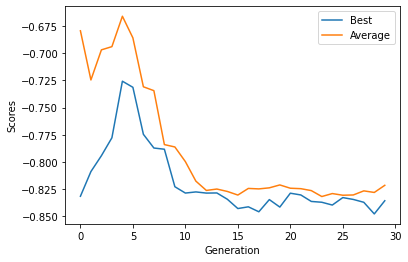

Score after feature selection: 0.84


In [143]:
selector = GeneticSelector(estimator=svr, 
                      n_gen=30, size=100, n_best=20, n_rand=20, 
                      n_children=5, mutation_rate=0.05)
selector.fit(x, y)
selector.plot_scores()
score = cross_val_score(svr, x[:,selector.support_], y, cv=5, scoring=None)
print("Score after feature selection: {:.2f}".format(np.mean(score)))

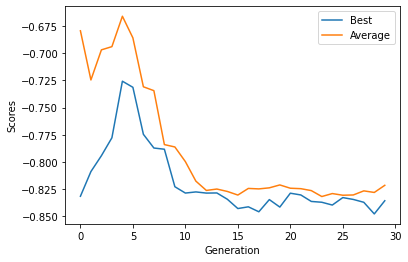

In [144]:
populati=selector.ret_pop()

selector.plot_scores()

In [145]:
len(populati)


30

In [146]:
for i in range(len(populati)):
  count=0
  for j in range(len(x[0])):
    if(populati[i][j]==True):
      count=count+1
  print("features selected in ",(i+1)," th generation =",count)


features selected in  1  th generation = 459
features selected in  2  th generation = 510
features selected in  3  th generation = 502
features selected in  4  th generation = 495
features selected in  5  th generation = 488
features selected in  6  th generation = 488
features selected in  7  th generation = 478
features selected in  8  th generation = 480
features selected in  9  th generation = 481
features selected in  10  th generation = 420
features selected in  11  th generation = 443
features selected in  12  th generation = 450
features selected in  13  th generation = 453
features selected in  14  th generation = 453
features selected in  15  th generation = 416
features selected in  16  th generation = 420
features selected in  17  th generation = 442
features selected in  18  th generation = 438
features selected in  19  th generation = 422
features selected in  20  th generation = 436
features selected in  21  th generation = 431
features selected in  22  th generation = 4

In [0]:
for j in range(650,700):
  populati[0][j]=True

In [0]:
score = np.mean(cross_val_score(svr, x[:,populati[0]], y, cv=5, scoring=None))

In [149]:
score

0.6880336378061291

In [150]:
x_train.shape

(100, 700)

In [0]:
population = []
for i in range(200):
  chromosome = np.ones(700, dtype=np.bool)
  mask = np.random.rand(len(chromosome)) < 0.3 #The probability 0.3 is chosen arbitrarily, however it is suggested to avoid large probabilities. We would not like to create chromosomes with all variables excluded
  chromosome[mask] = False
  population.append(chromosome)

In [0]:
population = np.array(population)
pop=list(population[[0,1,2]])

0.8185703064554675
0.8323329655859222


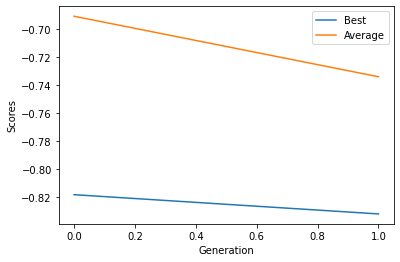

Score after feature selection: 0.72


In [153]:
sel = GeneticSelector(estimator=svr, 
                      n_gen=2, size=200, n_best=40, n_rand=40, 
                      n_children=5, mutation_rate=0.05)
sel.fit(x, y.ravel())
sel.plot_scores()
score = cross_val_score(svr, x[:,sel.support_], y, cv=5, scoring=None)
print("Score after feature selection: {:.2f}".format(np.mean(score)))

In [0]:
lst = []
columns = list(data.columns)
support = list(sel.support_)
for i in range(len(support)):
  if support[i] == False:
    lst.append(columns[i]) 

In [157]:
lst

['facebook_post_id',
 'dominant_color.histogram[0]',
 'dominant_color.histogram[1]',
 'dominant_color.histogram[4]',
 'dominant_color.histogram[8]',
 'face_detection.average_face_present',
 'general.duration',
 'general.frame_size.width',
 'other.average_movie_speed',
 'shot_detection.shots_count',
 'text_detection.average_text2frame_ratio',
 'title.sentiment',
 'views.2',
 'comments.2',
 'likes.2',
 'shares.4',
 'views.5',
 'comments.5',
 'shares.8',
 'comments.8',
 'shares.9',
 'likes.9',
 'shares.10',
 'shares.11',
 'comments.11',
 'views.12',
 'likes.13',
 'comments.14',
 'views.15',
 'views.16',
 'shares.16',
 'likes.16',
 'shares.17',
 'comments.17',
 'views.19',
 'comments.19',
 'likes.19',
 'views.20',
 'shares.20',
 'likes.20',
 'comments.21',
 'likes.21',
 'views.22',
 'likes.22',
 'shares.23',
 'comments.23',
 'shares.24',
 'views.25',
 'comments.26',
 'views.27',
 'shares.28',
 'likes.29',
 'shares.30',
 'comments.30',
 'shares.31',
 'comments.31',
 'shares.32',
 'likes.32'

In [0]:
ans = data.drop(lst,axis=1)

In [159]:
ans.shape

(1820, 467)

In [0]:
ans.to_csv('after_ga.csv', index=False)


In [0]:
from google.colab import files

files.download('after_ga.csv')

In [0]:
x_train

In [0]:
import numpy as np
child =np.array([1,0,1,0,1,1,1,1,0])
mask = np.random.rand(len(child))>.5
ghp=[1,0,1,0,0,0,0,0,1]
for i in range(len(mask)):
  if(mask[i]==True):
    child[i]=ghp[i]

In [0]:
child

In [0]:
cgf=[9,8,7]
np.argsort(cgf)

In [0]:
np.random.rand(900)<.3